# Run with google colab

In [1]:
!pip install wget
!pip install jcopdl
!pipp install gdown

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=8607cc3e761e0c4fd91913dec951a6a4d309f31b54012c8ddf52e83ae1bfda36
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Created wheel for jcopdl: filename=jcopdl-1.1.9-py2.py3-none-any.whl size=16923 sha256=551cdabfcd536e001a3dc2cba63c682e43cdb82dedee13b8ce53f1739afc066a
  Stored in directory: /root/.cache/pip/wheels/e5/78/9d/931694cba38491e16f1a94719193211fd12a7307570d9bb562
Successfully built jcopdl
/bin/bash: pipp: command not found


In [2]:
import wget
from tqdm import tqdm
import os
import shutil
import zipfile
import gdown

# Download data
https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset

In [3]:
if os.path.isfile('archive.zip') or os.path.exists('New Masks Dataset/'):
    print("File Sudah ada")
else:
    url = "https://drive.google.com/uc?export=download&id=1xqc_ML2H_6PtrgBS0pxd2pNWbPtjJitX"
    output = "archive.zip"
    gdown.download(url, output, False)
    print("\nDownload Selesai")

Downloading...
From: https://drive.google.com/uc?export=download&id=1xqc_ML2H_6PtrgBS0pxd2pNWbPtjJitX
To: /content/archive.zip
100%|██████████| 217M/217M [00:01<00:00, 157MB/s]



Download Selesai


In [4]:
if os.path.exists('New Masks Dataset/'):
    print("File Sudah di extract")
else:
    with zipfile.ZipFile('archive.zip', mode='r') as zip_file:
        for zf in tqdm(zip_file.infolist(), desc="Extracting"):
            try:
                zip_file.extract(zf)                
            except Exception as e:
                print(e)
    zip_file.close()
    print("Proses extract berhasil")

Extracting: 100%|██████████| 1006/1006 [00:02<00:00, 402.18it/s]

Proses extract berhasil


In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import BytesIO

### Menghitung banyak data 

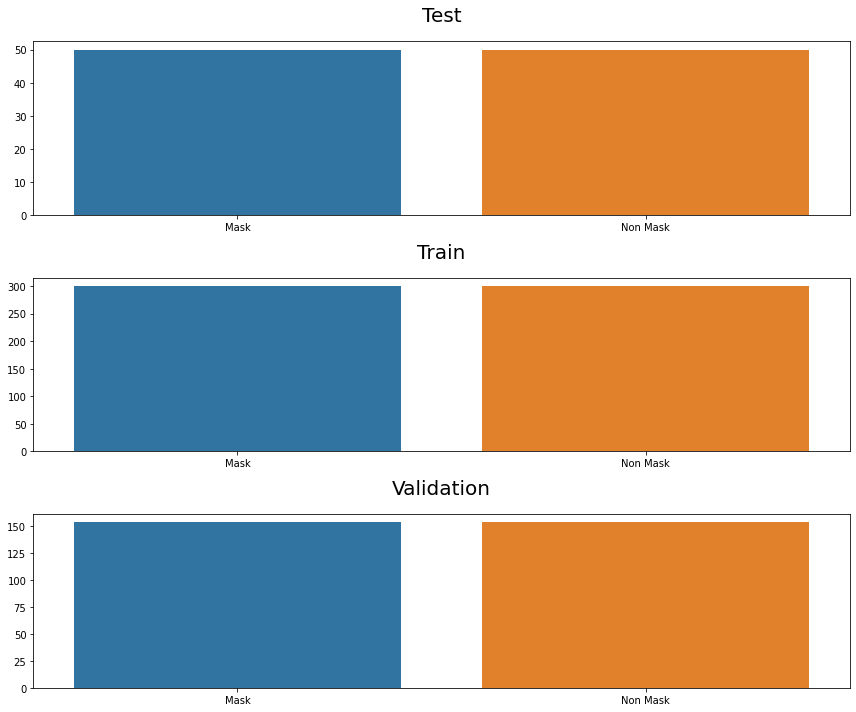

In [6]:
x = ['Test', 'Train', 'Validation']
fig, ax = plt.subplots(3,1, figsize=(12,10))
index=0
for label in x:
    #plt.bar(
    #    ['Mask', 'Non Mask'],
    #    [
    #        len(os.listdir('New Masks Dataset/'+label+'/Mask/')),
    #        len(os.listdir('New Masks Dataset/'+label+'/Non Mask/'))
    #    ]
    #)
    sns.barplot(
        x=['Mask', 'Non Mask'],
        y=[
            len(os.listdir('New Masks Dataset/'+label+'/Mask/')),
            len(os.listdir('New Masks Dataset/'+label+'/Non Mask/'))
        ],
        ax=ax[index]
    )
    ax[index].set_title(label, pad=20, fontsize=20)
    index+=1
    

fig.tight_layout()
fig.show()

### visualize random data

In [12]:
import random 
import numpy as np

In [13]:
def show_image(im, title=""):
  plt.figure(figsize=(10,10))
  plt.title(title, size=50)
  plt.imshow(im)
  plt.axis(False)
  plt.show()

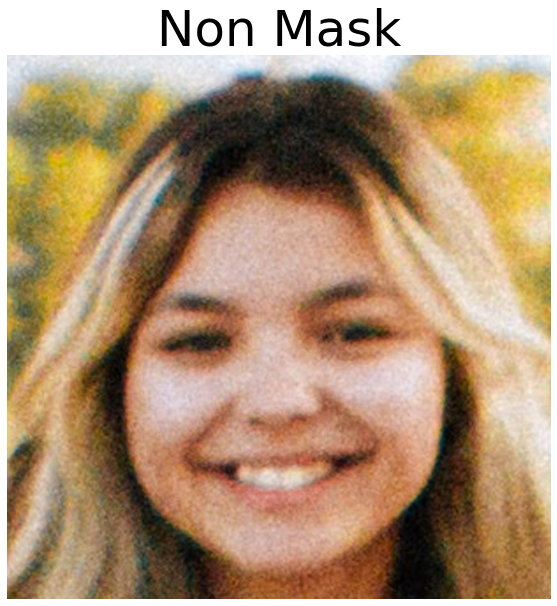

In [14]:
label = ['Mask', 'Non Mask']
idxlabel = random.randint(0, len(label)-1)
target = label[idxlabel]
feature = 'New Masks Dataset/Test/'+target+'/'
idx = random.randint(0, len(os.listdir(feature))-1)
img = Image.open(fp=feature+str(os.listdir(feature)[idx]))
# req = requests.get("https://github.com/googlefonts/roboto/blob/master/src/hinted/Roboto-Regular.ttf?raw=true")

# font = ImageFont.truetype(BytesIO(req.content), 50)
# d = ImageDraw.Draw(img)
# d.text((10,10), str(target), fill=(255,100,0))
# img
title = str(target)
# im = plt.imread(feature+str(os.listdir(feature)[idx]))
show_image(np.array(img), title)

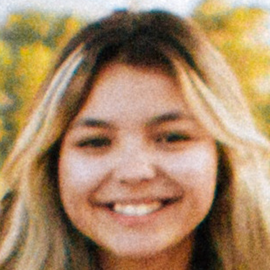

In [15]:
filter_ = transforms.Resize(270)
filter2 = transforms.CenterCrop(256)
#contrast = transforms.ColorJitter(contrast=0.9)
#contrast(img)
#brightness = transforms.ColorJitter(brightness=0.85)
#brightness(img)
#translate = transforms.RandomAffine(0, translate=(0.4, 0.4))
#translate(img)
#hflip = transforms.RandomHorizontalFlip()
filter_(img)

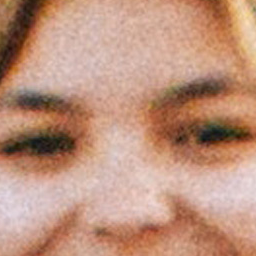

In [16]:
filter2(img)

### Dataset & Dataloader

In [17]:
bs = 50

crop_size = 256

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=crop_size, scale=(0.75,1.0)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(260),
    transforms.CenterCrop(crop_size),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("New Masks Dataset/Train", transform=train_transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

val_set = datasets.ImageFolder("New Masks Dataset/Validation", transform=test_transform)
valloader = DataLoader(val_set, batch_size=bs, shuffle=True)

test_set = datasets.ImageFolder("New Masks Dataset/Test", transform=test_transform)
testloader = DataLoader(test_set, batch_size=bs,  shuffle=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [18]:
feature, target = next(iter(trainloader))
feature.shape

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([50, 3, 256, 256])

In [19]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [20]:
from jcopdl.layers import linear_block, conv_block

In [21]:
from torchvision.models import mobilenet_v2

mnet = mobilenet_v2(pretrained=True)

for param in mnet.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

In [22]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [23]:
mnet.classifier = nn.Sequential(
    nn.Linear(1280, 5),
    nn.LogSoftmax()
)

In [24]:
mnet

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [25]:
class CustomMobilenetV2(nn.Module):
    def __init__(self, output_size):
        super().__init__()
        self.mnet = mobilenet_v2(pretrained=True)
        self.freeze()
        self.mnet.classifier = nn.Sequential(
            nn.Linear(1280, output_size),
            nn.LogSoftmax()
        )
        
    def forward(self, x):
        return self.mnet(x)

    def freeze(self):
        for param in self.mnet.parameters():
            param.requires_grad = False
            
    def unfreeze(self):        
        for param in self.mnet.parameters():
            param.requires_grad = True        

In [26]:
config = set_config({
    "batch_size":bs,
    "crop_size":crop_size,
    "output_activation": "lsoftmax",
})

Phase 1: Adaptation (lr standard + patience kecil)

In [27]:
model = CustomMobilenetV2(output_size=2).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, early_stop_patience=2, outdir="model")

In [31]:
model

CustomMobilenetV2(
  (mnet): MobileNetV2(
    (features): Sequential(
      (0): ConvBNActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): ConvBNActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): ConvBNActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1), str

In [28]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train:   0%|          | 0/12 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.4257 | Test_cost  = 0.3384 | Train_score = 0.8883 | Test_score = 0.9500 |


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.2106 | Test_cost  = 0.2454 | Train_score = 0.9717 | Test_score = 0.9400 |
==> EarlyStop patience =  1 | Best test_score: 0.9500


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.1496 | Test_cost  = 0.2161 | Train_score = 0.9833 | Test_score = 0.9500 |
==> EarlyStop patience =  2 | Best test_score: 0.9500
==> Execute Early Stopping at epoch: 3 | Best test_score: 0.9500
==> Best model is saved at model


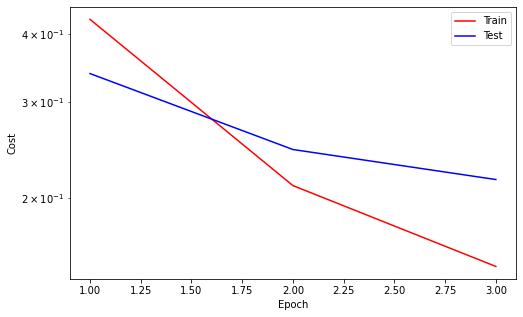

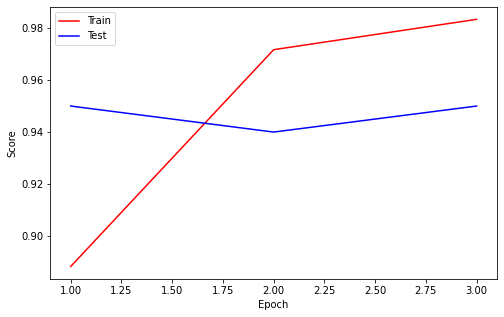

In [40]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

## Phase 2: Fine-tuning (lr dikecilin, patience ditambah)


In [41]:
model.unfreeze()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)
callback.reset_early_stop()
callback.early_stop_patience = 5

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train:   0%|          | 0/12 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.2153 | Test_cost  = 0.2322 | Train_score = 0.9817 | Test_score = 0.9800 |


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.1329 | Test_cost  = 0.1653 | Train_score = 0.9900 | Test_score = 0.9800 |
==> EarlyStop patience =  1 | Best test_score: 0.9800


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.0901 | Test_cost  = 0.1316 | Train_score = 0.9917 | Test_score = 0.9800 |
==> EarlyStop patience =  2 | Best test_score: 0.9800


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.0699 | Test_cost  = 0.1164 | Train_score = 0.9883 | Test_score = 0.9800 |
==> EarlyStop patience =  3 | Best test_score: 0.9800


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.0559 | Test_cost  = 0.1052 | Train_score = 0.9917 | Test_score = 0.9800 |
==> EarlyStop patience =  4 | Best test_score: 0.9800


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f551fb2a0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f551fb2a0e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.0382 | Test_cost  = 0.0983 | Train_score = 0.9967 | Test_score = 0.9800 |
==> EarlyStop patience =  5 | Best test_score: 0.9800
==> Execute Early Stopping at epoch: 9 | Best test_score: 0.9800
==> Best model is saved at model


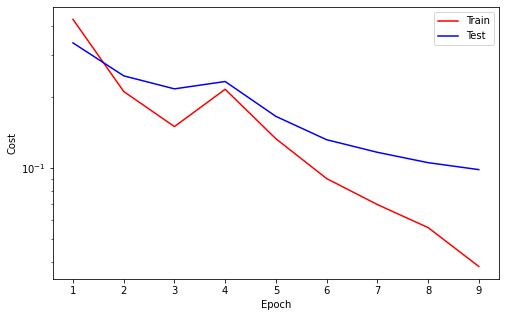

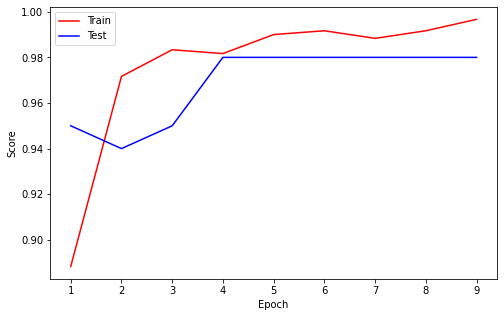

In [42]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

In [43]:
optimizer = optim.AdamW(model.parameters(), lr=1e-7)
callback.reset_early_stop()
callback.early_stop_patience = 5

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train:   0%|          | 0/12 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.1707 | Test_cost  = 0.2339 | Train_score = 0.9883 | Test_score = 0.9800 |
==> EarlyStop patience =  1 | Best test_score: 0.9800


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.1624 | Test_cost  = 0.2371 | Train_score = 0.9967 | Test_score = 0.9800 |
==> EarlyStop patience =  2 | Best test_score: 0.9800


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.1617 | Test_cost  = 0.2369 | Train_score = 0.9917 | Test_score = 0.9800 |
==> EarlyStop patience =  3 | Best test_score: 0.9800


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.1597 | Test_cost  = 0.2395 | Train_score = 0.9967 | Test_score = 0.9800 |
==> EarlyStop patience =  4 | Best test_score: 0.9800


Train:   0%|          | 0/12 [00:00<?, ?it/s]

Test:   0%|          | 0/2 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.1688 | Test_cost  = 0.2358 | Train_score = 0.9850 | Test_score = 0.9800 |
==> EarlyStop patience =  5 | Best test_score: 0.9800
==> Execute Early Stopping at epoch: 14 | Best test_score: 0.9800
==> Best model is saved at model


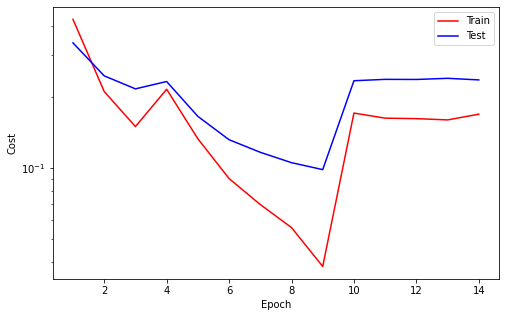

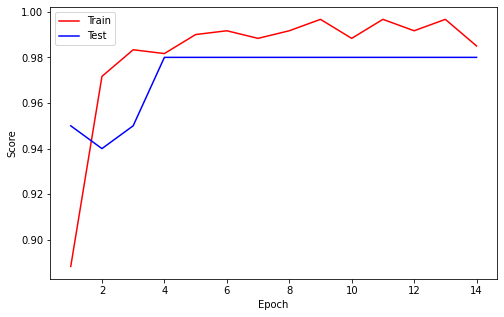

In [44]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

In [45]:
feature, target = next(iter(valloader))
feature, target = feature.to(device), target.to(device)

In [46]:
feature, target = next(iter(valloader))
feature, target = feature.to(device), target.to(device)
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0], device='cuda:0')

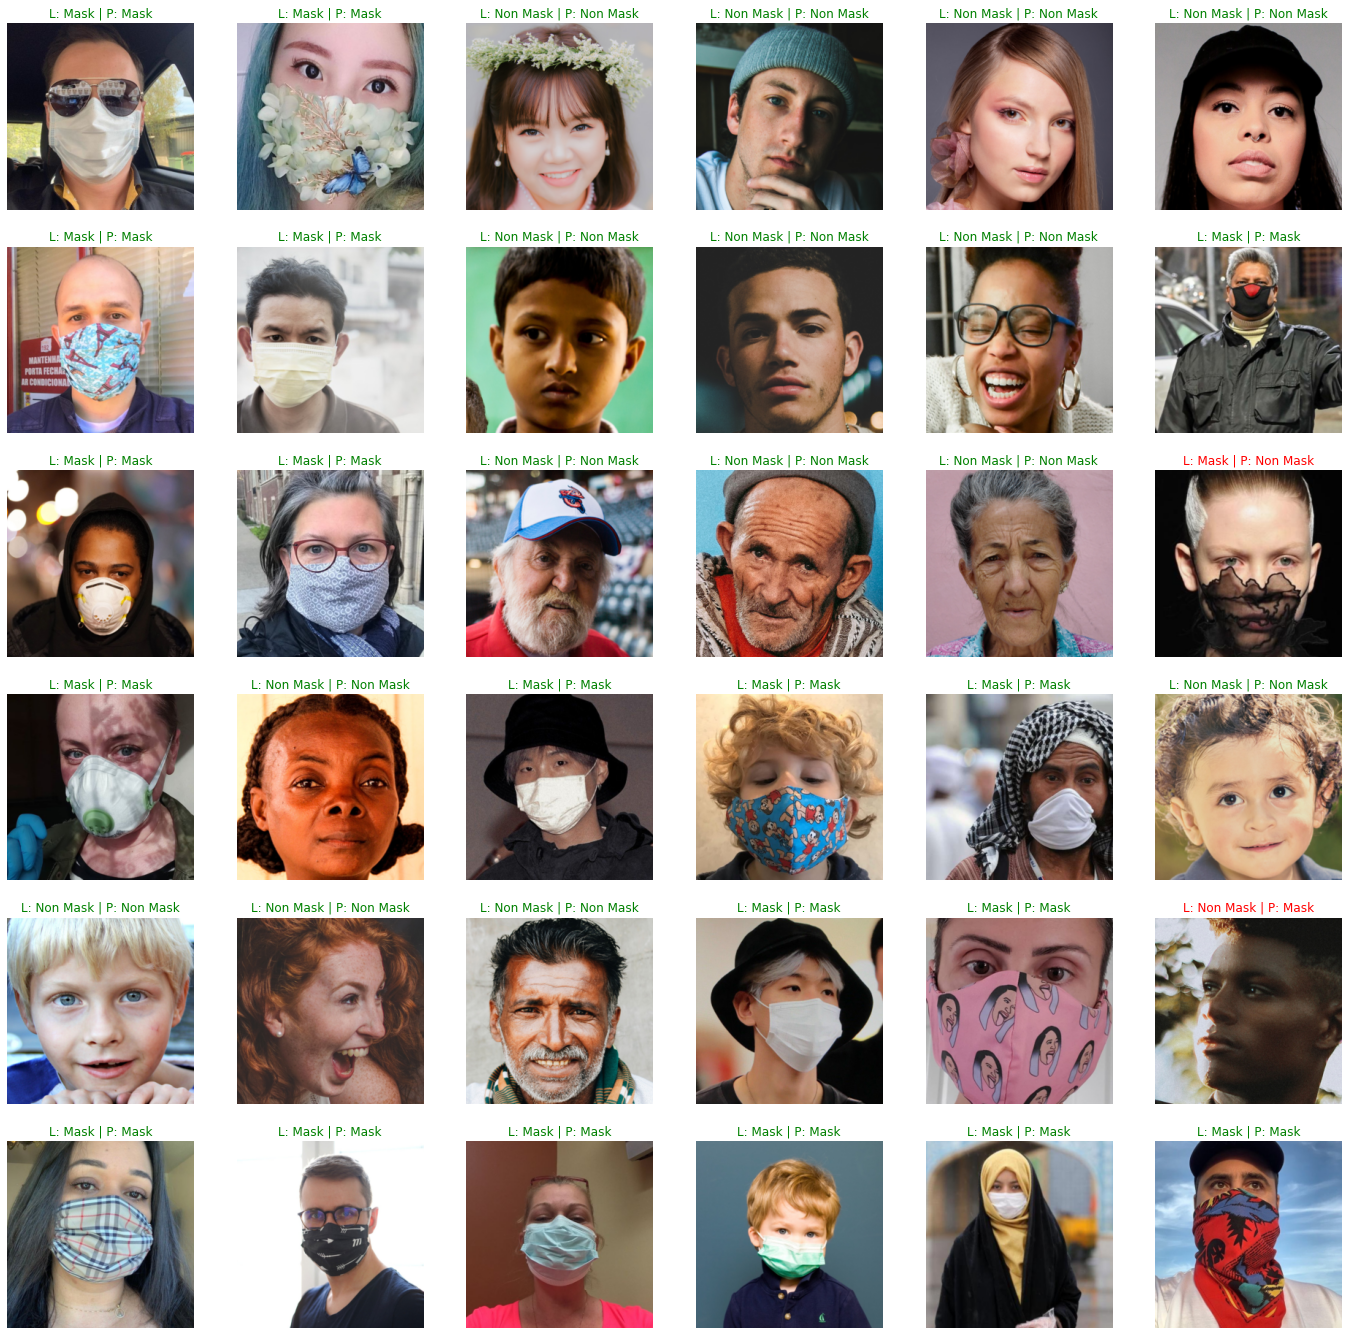

In [47]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for image, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(image.permute(1, 2, 0).cpu())
    font = {"color": 'r'} if label != pred else {"color": 'g'}        
    label, pred = val_set.classes[label.item()], val_set.classes[pred.item()]
    ax.set_title(f"L: {label} | P: {pred}", fontdict=font);
    ax.axis('off');

In [48]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/logs.pth (deflated 45%)
  adding: content/model/weights_best.pth (deflated 8%)
  adding: content/model/configs.pth (deflated 47%)
